# Computer Vision 

### Task 1

Import the "rgb.png" image 

<img src = "Images/rgb.png" style="width:300px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)

b) Convert the image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

c) Apply an appropriate mask on the "rgb.png" image based on pixel intensity values to display the red pixels only.

d) Convert the "rgb.png" image to HSV, adjust the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Helper function to display grayscale images in a 1x3 plot for task 1a
def display_gray_images(images, titles, cols=3):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

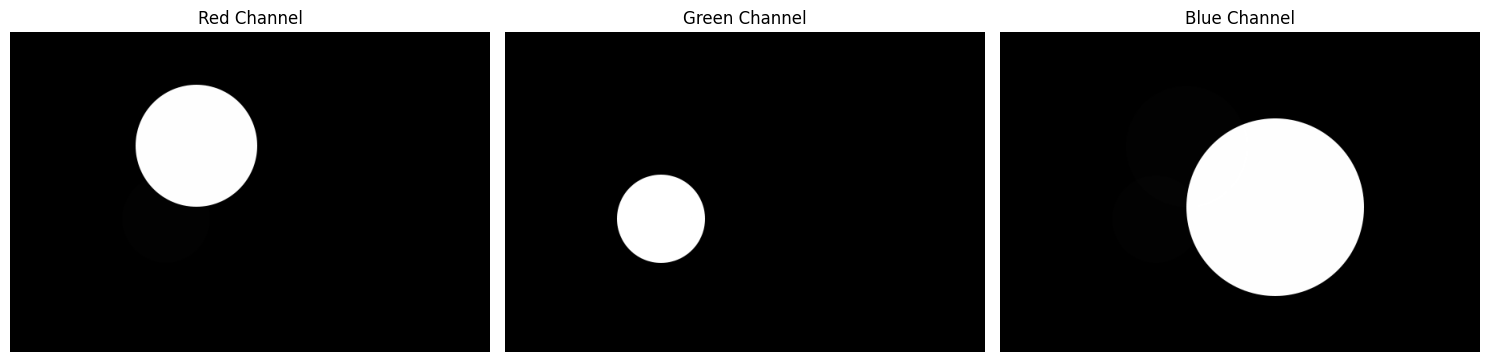

In [32]:
#a) Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)
# Load the image
image = cv2.imread('Images/rgb.png')

# Convert from BGR (OpenCV default) to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#display the Red, Green, Blue color channels using the helper function
display_gray_images([rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]],
               ['Red Channel', 'Green Channel', 'Blue Channel'])

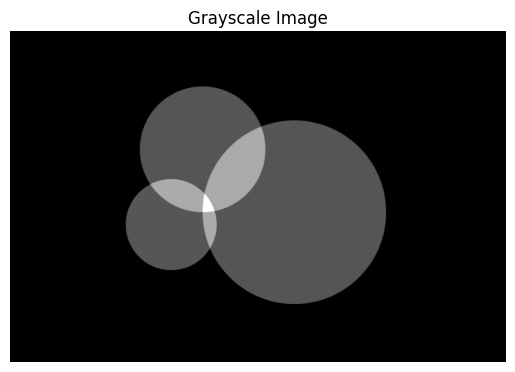

In [33]:
#b) Convert the image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.
#Weighted_Gray = (0.3*red_channel + 0.59*green_channel + 0.11*blue_channel) / 3
grayscale_image = rgb[:, :, 0]/3+rgb[:, :, 1]/3+rgb[:, :, 2]/3
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

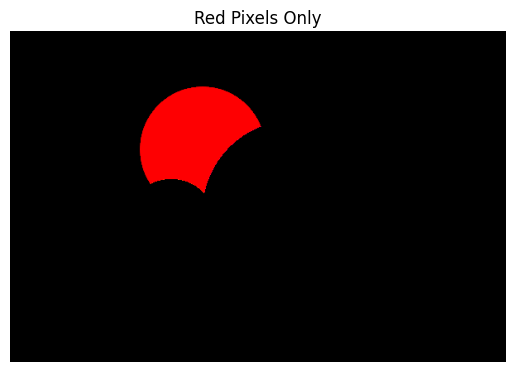

In [34]:
#c) Apply an appropriate mask on the "rgb.png" image based on pixel intensity values to display the red pixels only.
mask_red = (rgb[:, :, 0] > 150) & (rgb[:, :, 1] < 100) & (rgb[:, :, 2] < 100)  # thresholds
red_only = np.zeros_like(rgb)
red_only[:, :, 0] = rgb[:, :, 0] * mask_red  # Red
red_only[:, :, 1] = rgb[:, :, 1] * mask_red  # Green
red_only[:, :, 2] = rgb[:, :, 2] * mask_red  # Blue

plt.imshow(red_only)
plt.title('Red Pixels Only')
plt.axis('off')
plt.show()

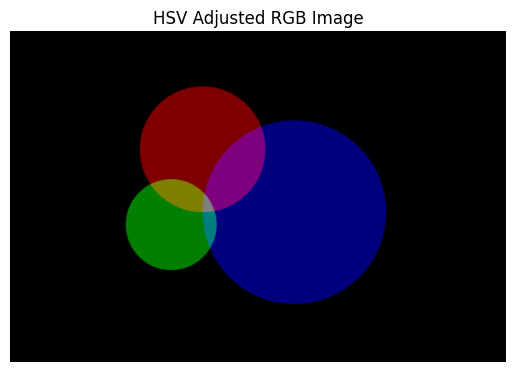

In [35]:
#d) Convert the "rgb.png" image to HSV, adjust the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.
hsv_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
hsv_image[:, :, 2] = hsv_image[:, :, 2] * 0.5  # Adjust value/brightness to 50%
adjusted_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB) # Convert back to RGB from HSV

plt.imshow(adjusted_rgb)
plt.title('HSV Adjusted RGB Image')
plt.axis('off')
plt.show()

### Task 2

a) Import the "apple.jpg" image 

<img src = "Images/apple.jpg" style="width:300px;height:200px">

We'd like to extract the green apple from the image above. Apply a suitable mask to extract the green apple from the RGB image. Then, covert the image to HSV space and apply a suitable mask to extract the green apple.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot. 




In [36]:
#function to display rgb images in 1x3 Plot for Task 2a and 2b
def display_images(images, titles, cols=3):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, cols, i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

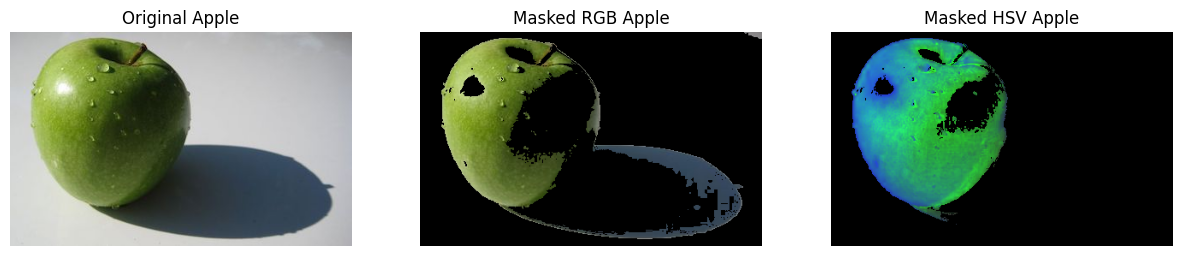

In [37]:
apple_img = cv2.imread('Images/apple.jpg')
apple_rgb = cv2.cvtColor(apple_img, cv2.COLOR_BGR2RGB)

# Mask the green apple in RGB space
lower_rgb = np.array([0, 70, 0])  # Adjust based on color range for green
upper_rgb = np.array([200, 255, 140])
rgb_apple = cv2.inRange(apple_rgb, lower_rgb, upper_rgb)
mask_apple_rgb = cv2.bitwise_and(apple_rgb, apple_rgb, mask=rgb_apple)

# Convert the mask apple rgb image to HSV
apple_hsv = cv2.cvtColor(apple_rgb, cv2.COLOR_RGB2HSV) #Apple RGB image (original without mask) converted to HSV

# Mask the green apple in HSV space
lower_hsv = np.array([5, 55, 45])  # Adjust based on the green hue range in HSV
upper_hsv = np.array([55, 255, 220])
hsv_apple = cv2.inRange(apple_hsv, lower_hsv, upper_hsv)
mask_apple_hsv = cv2.bitwise_and(apple_hsv, apple_hsv, mask=hsv_apple)

# Display the original, RGB masked, and HSV masked images
display_images([apple_rgb, mask_apple_rgb, mask_apple_hsv],
               ['Original Apple', 'Masked RGB Apple', 'Masked HSV Apple'])

b) Import the "bags.png" image 

<img src = "Images/bags.png" style="width:300px;height:200px">

We'd like to extract the orange bag from the image above. Apply a suitable mask to extract the orange bag in RGB color space. Then, covert the image to HSV space and apply a suitable mask to extract the same orange bag.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot. 

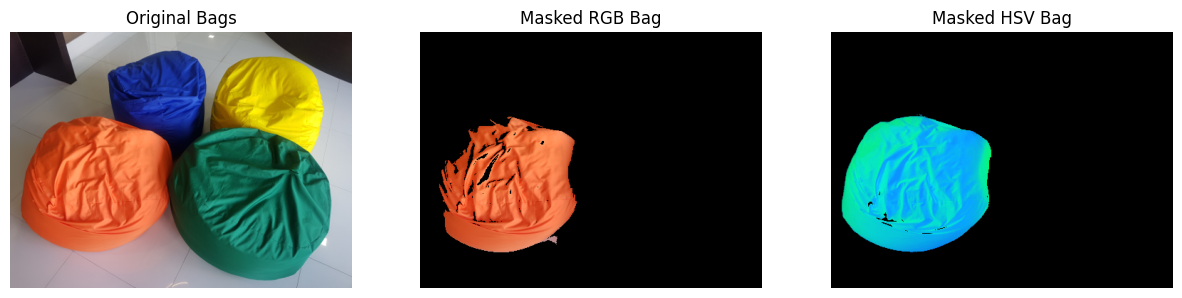

In [38]:
# Load the bags image
bags_img = cv2.imread('Images/bags.png')
bags_rgb = cv2.cvtColor(bags_img, cv2.COLOR_BGR2RGB)

# Mask the orange bag in RGB space
lower_rgb = np.array([185, 25, 15])  # Adjust based on the orange color range
upper_rgb = np.array([255, 155, 145])
rgb_bag = cv2.inRange(bags_rgb, lower_rgb, upper_rgb)
mask_bags_rgb = cv2.bitwise_and(bags_rgb, bags_rgb, mask=rgb_bag)

# Convert the bags image to HSV
bags_hsv = cv2.cvtColor(bags_rgb, cv2.COLOR_RGB2HSV)

# Mask the orange bag in HSV space
lower_orange_hsv = np.array([5, 87, 110])  # Adjust based on the orange hue range in HSV
upper_orange_hsv = np.array([15, 255, 255])
hsv_bag = cv2.inRange(bags_hsv, lower_orange_hsv, upper_orange_hsv)
mask_bags_hsv = cv2.bitwise_and(bags_hsv, bags_hsv, mask=hsv_bag)

# Display the original, RGB masked, and HSV masked images
display_images([bags_rgb, mask_bags_rgb, mask_bags_hsv],
               ['Original Bags', 'Masked RGB Bag', 'Masked HSV Bag'])

### Task 3

Import the "bird.jpg" image and apply the following point processing to it.
<img src = "Images/bird.jpg" style="width:150px;height:300px">

a) Create a darker image by subtracting 128 from each pixel intensity value.

b) Create a nonlinear lower contrast image by applying the formula $(x / 255)^{1/3}$ X 255, where x is the original pixel intensity.

c) Invert the original image where the pixel values are updated as 255 - current pixel intensity value.

d) Create a brighter image by adding 128 to each pixel intensity value.

e) Create a nonlinear higher contrast image by applying the formula $(x / 255)^{2}$ X 255, where x is the original pixel intensity.

Display all of these images along with the original image in a 2X3 grid.

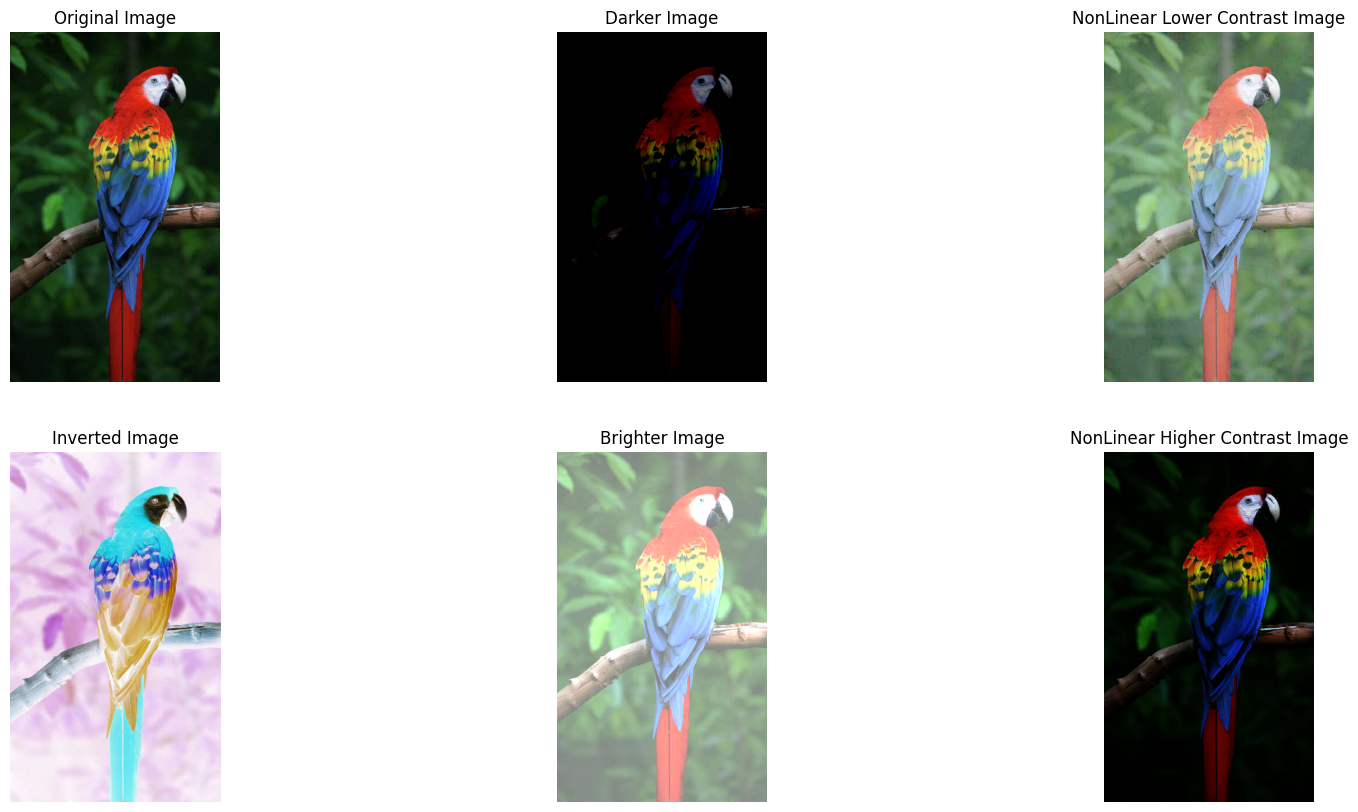

In [39]:
# Load the bird image
bird_img = cv2.imread('Images/bird.jpg')
bird_rgb = cv2.cvtColor(bird_img, cv2.COLOR_BGR2RGB)

# a) Create a darker image by subtracting 128 from each pixel intensity value
dark= cv2.subtract(bird_rgb,128)

# b) Create a nonlinear lower contrast image using the formula (x / 255)^(1/3) * 255
lower_contrast = np.power(bird_rgb / 255.0, 1/3) * 255
lower_contrast_img = np.clip(lower_contrast, 0, 255).astype(np.uint8)

# c) Invert the original image by subtracting each pixel from 255
inverted_img = cv2.subtract(255, bird_rgb)

# d) Create a brighter image by adding 128 to each pixel intensity value
bright= cv2.add(bird_rgb,128)

# e) Create a nonlinear higher contrast image using the formula (x / 255)^2 * 255
higher_contrast = np.power(bird_rgb / 255.0, 2) * 255
higher_contrast_img = np.clip(higher_contrast, 0, 255).astype(np.uint8)

# Display the original and processed images in a 2x3 grid
images = [bird_rgb, dark, lower_contrast_img, inverted_img, bright, higher_contrast_img]
titles = ['Original Image', 'Darker Image', 'NonLinear Lower Contrast Image', 'Inverted Image', 'Brighter Image', 'NonLinear Higher Contrast Image']

# Plot the images
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### Task 4 

Import the "cameraman.jpeg" image 
<img src = "Images/cameraman.jpeg" style="width:300px;height:300px">

a) Perform average blur with kernel size 7X7 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid.


b) Perform gaussian blur with kernel size 7X7, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 15X15, sigma 10. Display the original image with the filtered/processed images in a 1X3 grid.


c) Perform median blur with kernel size 7X7 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid.


d) Resize the original image to 40X40 pixels. Also, resize the guassian blurred image with kernel size 15X15 and sigma 10 to 40X40 pixels. Display the original image with the resized images in a 1X3 grid.


Note: Apply zero-padding to make the filtered image size same as original image. 

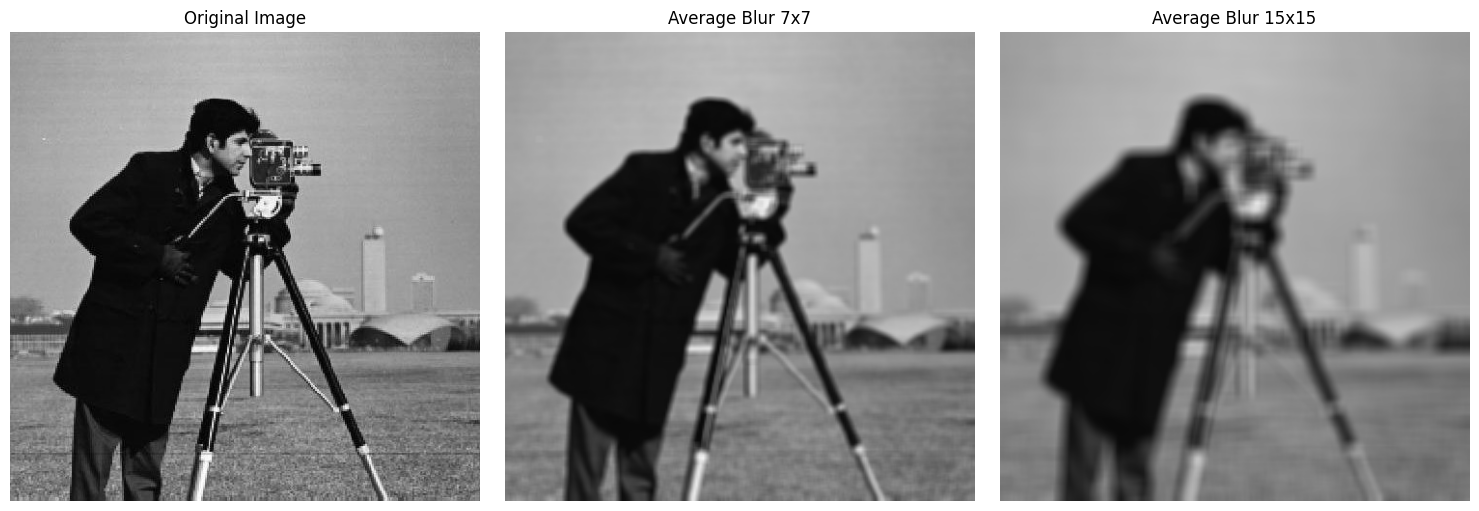

In [40]:
# Load the image
cameraman_img = cv2.imread('Images/cameraman.jpeg')

# a) Perform average blur with kernel size 7X7 and 15X15
avg_blur_7x7 = cv2.blur(cameraman_img, (7, 7))
avg_blur_15x15 = cv2.blur(cameraman_img, (15, 15))

# Display the original and blured imahe using helper function
display_gray_images([cameraman_img, avg_blur_7x7, avg_blur_15x15],
               ['Original Image', 'Average Blur 7x7', 'Average Blur 15x15'])

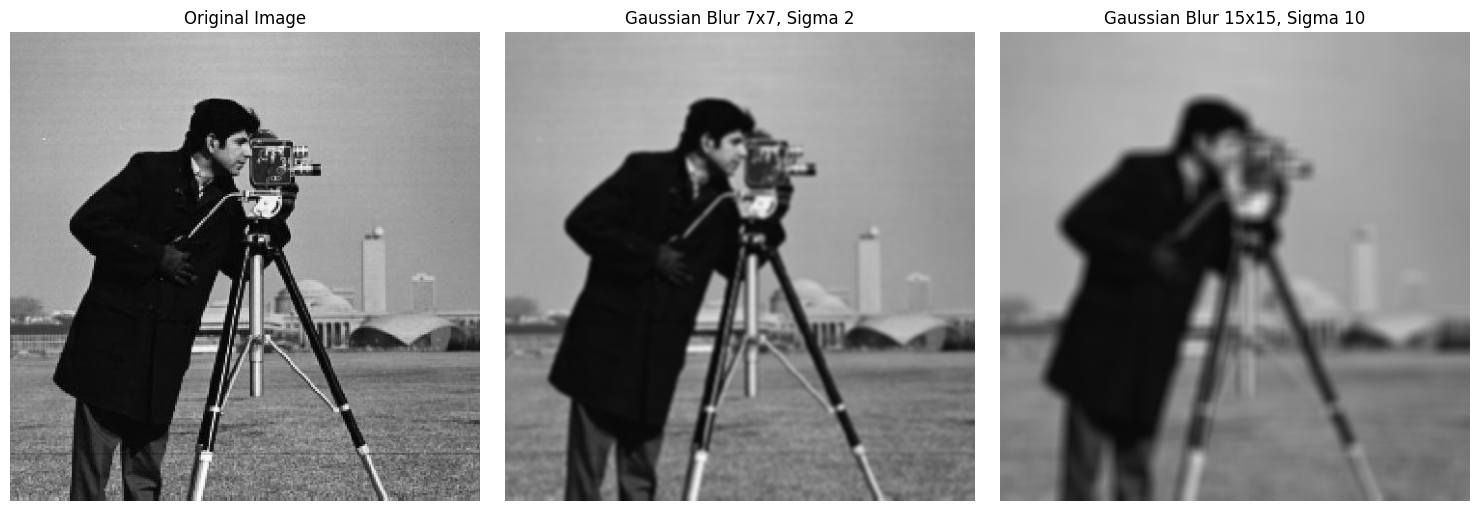

In [41]:
# b) Perform Gaussian blur with kernel size 7x7, sigma 2.0 and kernel size 15x15, sigma 10.0
gaussian_blur_7x7 = cv2.GaussianBlur(cameraman_img, (7, 7), 2.0)
gaussian_blur_15x15 = cv2.GaussianBlur(cameraman_img, (15, 15), 10.0)

# Display the original and Gaussian blurred images in a 1x3 grid
display_gray_images([cameraman_img, gaussian_blur_7x7, gaussian_blur_15x15],
               ['Original Image', 'Gaussian Blur 7x7, Sigma 2', 'Gaussian Blur 15x15, Sigma 10'])

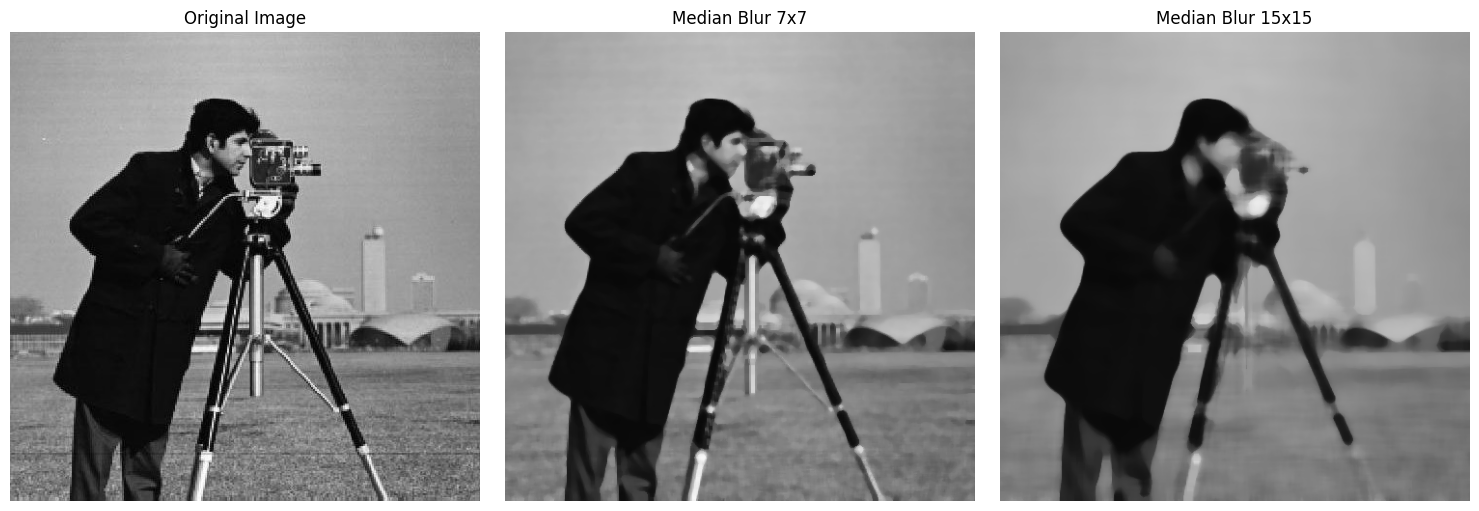

In [42]:
# c) Perform median blur with kernel size 7X7 and 15X15
# Median blur kernel size must be odd, so 7x7 and 15x15 are valid
median_blur_7x7 = cv2.medianBlur(cameraman_img, 7)
median_blur_15x15 = cv2.medianBlur(cameraman_img, 15)

# Display the original and median blurred images in a 1x3 grid using helper display function
display_gray_images([cameraman_img, median_blur_7x7, median_blur_15x15],
               ['Original Image', 'Median Blur 7x7', 'Median Blur 15x15'])

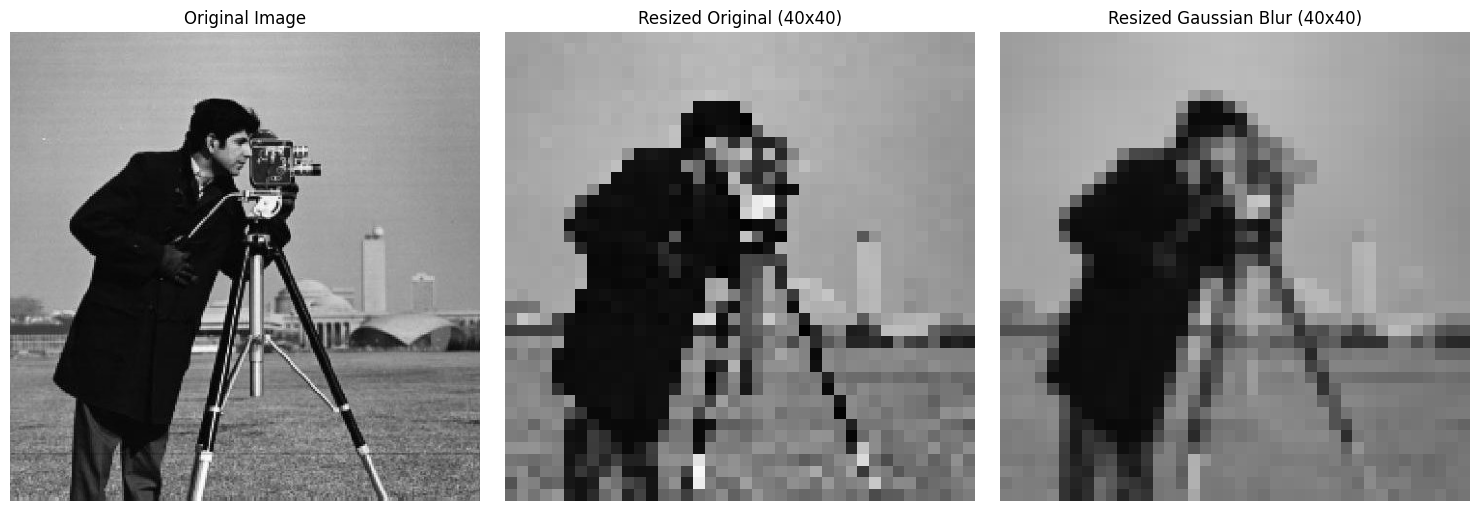

In [43]:
# d) Resize the original image and Gaussian blurred image with kernel size 15X15 and sigma 10 to 40x40 pixels
resized_original = cv2.resize(cameraman_img, (40, 40))
resized_gaussian_blur = cv2.resize(gaussian_blur_15x15, (40, 40))

# Display the original image and the resized images in a 1x3 grid using helper display function
display_gray_images([cameraman_img, resized_original, resized_gaussian_blur],
               ['Original Image', 'Resized Original (40x40)', 'Resized Gaussian Blur (40x40)'])

### Task 5 
a) Import the "cmu.jpg" image and apply the "shadow effect" on the image. (any reasonable amount of blurring will be considered correct)
<img src = "Images/cmu.jpg" style="width:200px;height:100px">

b) Import the "dallas.jpg" imahe and apply the "tilt shift effect" on the image where rows 400-500 is in the focus.
(any reasonable amount of blurring of the foreground and backgroud will be considered as correct)
<img src = "Images/dallas.jpg" style="width:300px;height:180px">


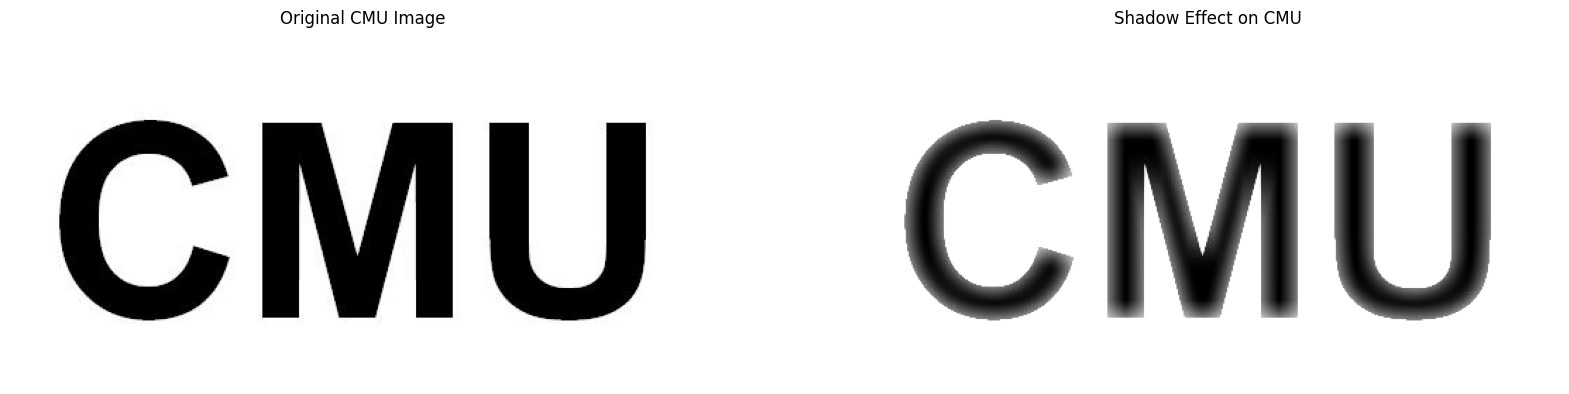

In [44]:
# Task to Apply shadow effect on "cmu.jpg"
# Load the CMU image
cmu_img = cv2.imread('Images/cmu.jpg')

# Apply Gaussian blur for blur effect 
blur_cmu_img = cv2.GaussianBlur(cmu_img, (25, 25), 14)
shadow_cmu_img = cv2.add(cmu_img, blur_cmu_img )#For shadow effect combine original image and blur image
# Display original and shadow image
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(cmu_img)
plt.title('Original CMU Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(shadow_cmu_img)
plt.title('Shadow Effect on CMU')
plt.axis('off')

plt.show()

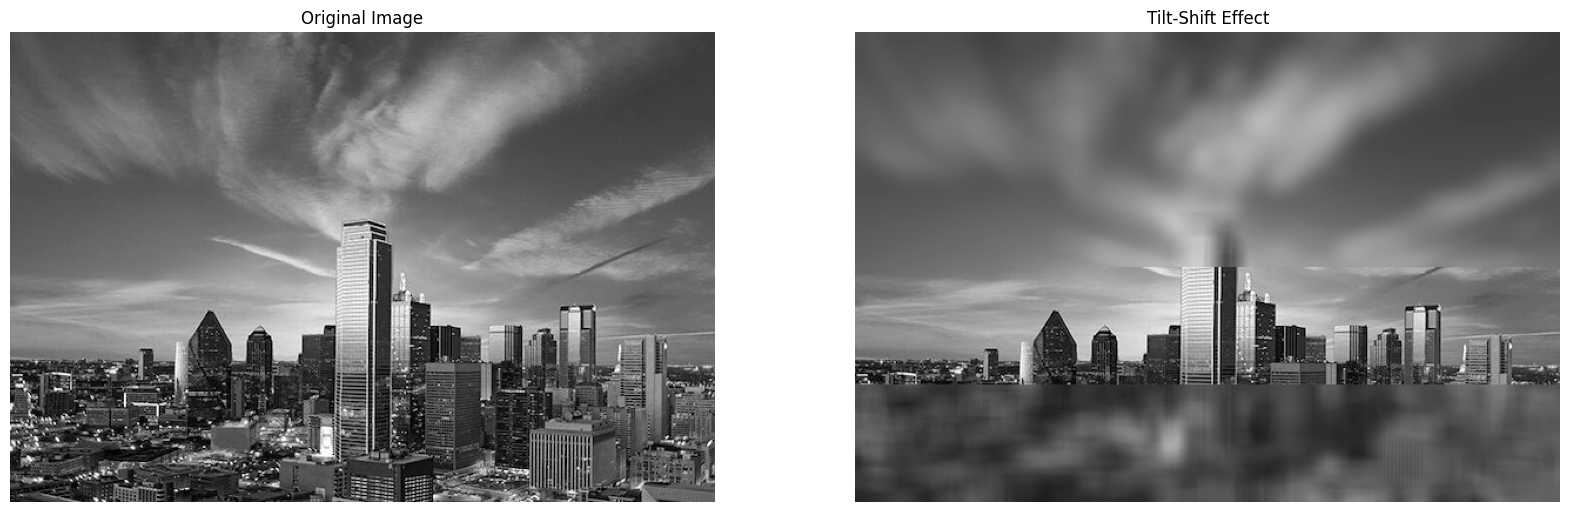

In [45]:
# Load the Dallas image
dallas_img = cv2.imread('Images/dallas.jpg' , cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to simulate out-of-focus areas
blurred_img = cv2.GaussianBlur(dallas_img, (21, 21), 15)

# Define the weight mask for the tilt-shift effect
rows, cols = dallas_img.shape
weight = np.ones((rows, cols), dtype=np.float32)

# Row 200-300 not in focus, so set the weight to 0 
weight[200:300, :] = 0

# Apply a Gaussian blur to the mask for smooth transitions
mask = cv2.GaussianBlur(weight, (21, 21), 15)

# Create the tilt-shift effect by blending the original and blurred images using the formula weight*Gussianblur + (1.0 - weight)*original_image = tilt_shift_img
tilt_shift_img = weight * blurred_img + (1 - weight) * dallas_img 

# Convert the result back to uint8 format
tilt_shift_img = np.clip(tilt_shift_img, 0, 255).astype(np.uint8)

# Display the original and tilt-shift images
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(dallas_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tilt_shift_img, cmap='gray')
plt.title('Tilt-Shift Effect')
plt.axis('off')

plt.show()
